In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# if reading specific columns
get_col = lambda col: (line.split('\t')[col] for line in open('body.dat'))
# array.array('d',map(float,get_col(1)))

In [2]:
arr = np.genfromtxt('body.dat', delimiter = ' ', dtype = None)

In [3]:
time = [i[0] for i in arr]
x = [i[1] for i in arr]
y = [i[2] for i in arr]
theta = [i[3] for i in arr]

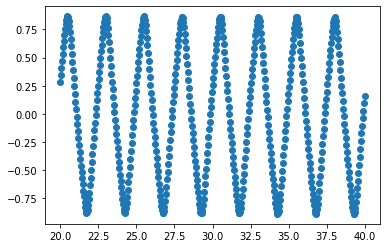

In [21]:
plt.scatter(time[500:1000], theta[500:1000])
plt.show()

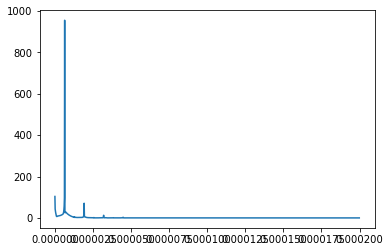

In [20]:
X = np.fft.fft(theta)
N = len(X)
n = np.arange(N)
# TODO: Put this into hertz
sr = 1 / len(time)
T = N/sr
freq = n/T

n_side = N//2
f_side = freq[:n_side]
plt.plot(f_side, np.abs(X[:n_side]))
plt.show()

/Users/haoyudu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


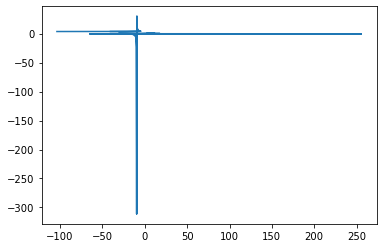

In [7]:
sp = np.fft.fft(np.sin(time))
plt.plot(freq, sp.real)


/Users/haoyudu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


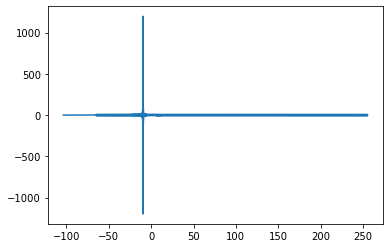

In [8]:
plt.plot(freq, sp.imag)

In [ ]:
body = np.loadtxt('body.dat').flatten()
body_2d = np.loadtxt('body.dat')

new_body_2d = []
body_2d = body_2d.tolist()

for i in range(len(body_2d)):
    body_2d[i].pop(0)
    new_body_2d.append(body_2d[i])

new_body_2d = np.array(np.array(new_body_2d))
new_body_2d = new_body_2d.flatten()
x_coords = new_body_2d[::3]
y_coords = new_body_2d[1::3]
theta = new_body_2d[2::3]

In [ ]:
plt.scatter(x_coords[:200], y_coords[:200])
plt.show()

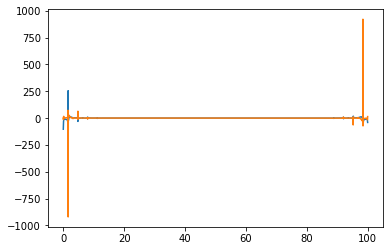

In [14]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()
freq = np.fft.fft(theta)
plt.plot(time, freq.real, time, freq.imag)